# Assignment 2 #
### Due: Friday, September 27 to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

## Name(s) and EID(s):
## Shashank Rao -  Sr55952
## Sarthak Shivnani - ss223347

Your homework should be written in a python notebook. There will be two submissions:

*   Exported PDF uploaded to Gradescope
*   ipynb file uploaded to Canvas

If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Gradescope and Canvas but make sure to include both students' names and UT EIDs.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook and PDF before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (**10 pts**)

(a) (**4 pts**) Describe the difference between model bias (bias of a regression model) and the bias of a point estimator (e.g. an estimator of what percentage of students at UT prefer Fall to Spring).

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

## Answer

a) Model bias refers to a regression model's systematic error in capturing the true relationship in data. It's about the model's overall predictive accuracy.
Bias of a point estimator is the difference between an estimator's expected value and the true population parameter. It concerns a single statistical estimate's accuracy.
Model bias is evaluated empirically using test data, while estimator bias can be determined theoretically.
Reducing model bias often involves increasing model complexity, whereas addressing estimator bias might require a different estimation method.
Model bias is typically discussed in machine learning contexts, while estimator bias is a fundamental concept in statistical inference.

b) you can tell the model is overfitting if :
Large gap between training and validation error
Training error very low, validation error high
Gap often increases with sample size
whiel for underfitting:
Both training and validation errors high
Smaller gap between training and validation error
Both curves may be relatively flat.
In an overfitting model, the validation error tends to be much higher because the model becomes too attuned to the specific features of the training data, failing to generalize broader patterns. As the training dataset grows, training errors drop near zero, but the validation error starts rising as overfitting occurs.

On the other hand, underfitting happens when the model is trained on too little data, resulting in high bias. In this case, the training error stays high, as the model struggles to capture the essential patterns in the data. The validation error remains elevated and aligns closely with the training error, indicating the model has overly simplified the data and cannot accurately represent it.

# Question 2: The Effect of Degree in Polynomial Models (25 pts)
Follow the instructions below to build polynomial models that can predict $y$ for input $x$ in the dataset ```data.npy```.

In [ ]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
seed = 123
random.seed(seed)
np.random.seed(seed)

In [ ]:
# Only use this code block if you are using Google Colab.
from google.colab import files

# It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving data (1).npy to data (1) (2).npy


In [ ]:
data_load = np.load('/content/data (1).npy', allow_pickle = True)
x_train = data_load.item().get("x_train")
y_train = data_load.item().get("y_train")
x_test = data_load.item().get("x_test")
y_test =data_load.item().get("y_test")
x_all = np.linspace(-10,10,101).reshape(-1,1)

(a) (10 pts) Implement the following two functions:

```python
def make_polynomial_features_and_standardize(deg, x_train, x_test, x_all):
```
*   Make the ```deg```-degree polynomial features of ```x_train```, ```x_test```, and ```x_all```: ```x_poly_train```, ```x_poly_test```, and ```x_poly_all```, respectively.
*   Fit a ```StandardScaler``` on ```x_poly_train``` and scale ```x_poly_train```, ```x_poly_test```, and ```x_poly_all```, resulting in ```x_poly_scaled_train```, ```x_poly_scaled_test```, and ```x_poly_scaled_all``` and return them.

```python
def plot_curves(x_train, y_train, x_test, y_test, x_all):
```
*   Fit polynomial models of degrees 3, 5, 21 to the training data.
*   Print out the mean squared error on both train and test sets for all the models.
*   Plot the data points (y_train v.s. x_train and y_test v.s. x_test)and the fitted models (predictions on x_all by different models vs x_all). Everything must be in the same figure and be clearly labeled.
*   Return the lists of train and test MSEs.

Tips: you can use ```np.vander(np.squeeze(x_train), deg+1)``` to generate the deg-degree polynomial vector of x_train. For example, ```np.vander(np.squeeze(x_train), 3)``` gives you the second-degree polynomial of x_train.


In [ ]:
def make_polynomial_features_and_standardize(deg, x_train, x_test, x_all):
    # Make the deg-degree polynomial features
    ### START CODE ###
    x_poly_train = np.vander(np.squeeze(x_train), deg+1)
    x_poly_test = np.vander(np.squeeze(x_test), deg+1)
    x_poly_all = np.vander(np.squeeze(x_all), deg+1)
    ### END CODE ###

    scaler = StandardScaler()
    # Scale the data
    ### START CODE ###
    # fit the scaler
    x_poly_scaled_train = scaler.fit_transform(x_poly_train)
    x_poly_scaled_test = scaler.transform(x_poly_test)
    x_poly_scaled_all = scaler.transform(x_poly_all)
    ### END CODE ###
    return x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all

def plot_curves(x_train, y_train, x_test, y_test, x_all):
    degs = [3, 5, 21]
    fig, ax = plt.subplots(1, 1, figsize=(8,8))

    # Plot the train and test data
    ax.plot(x_train, y_train,'ok', label='Train data')
    ax.plot(x_test, y_test, 'or', label='Test data')

    # Train and test MSE lists
    mse_train_list = []
    mse_test_list = []

    for deg in degs:
        x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all = make_polynomial_features_and_standardize(deg, x_train, x_test, x_all)

        # Create a linear model and fit on the train data
        ### START CODE ###
        linear_model = LinearRegression()
        linear_model.fit(x_poly_scaled_train, y_train)
        ### END CODE ###

        # Generate the predictions for train set, test set, and x_all
        ### START CODE ###
        y_pred_train = linear_model.predict(x_poly_scaled_train)
        y_pred_test =  linear_model.predict(x_poly_scaled_test)
        y_all = linear_model.predict(x_poly_scaled_all)
        ### END CODE ###

        # compute train and test mean squared error, append to the train and test MSE lists
        ### START CODE ###
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test =  mean_squared_error(y_test, y_pred_test)

        ### END CODE ###
        ax.plot(x_all, y_all ,label='degree %d' % deg)
        ax.legend(loc=2)

        print(f"Degree: {deg} Train MSE: {round(mse_train, 3)} Test MSE: {round(mse_test, 3)}")

    # Limit the graph to visualize the plot better
    ax.set_ylim([-100,100])
    ax.set_xlim([-5,5])
    plt.show()
    return mse_train_list, mse_test_list


Degree: 3 Train MSE: 164.219 Test MSE: 204.143
Degree: 5 Train MSE: 76.147 Test MSE: 79.604
Degree: 21 Train MSE: 66.223 Test MSE: 101.477


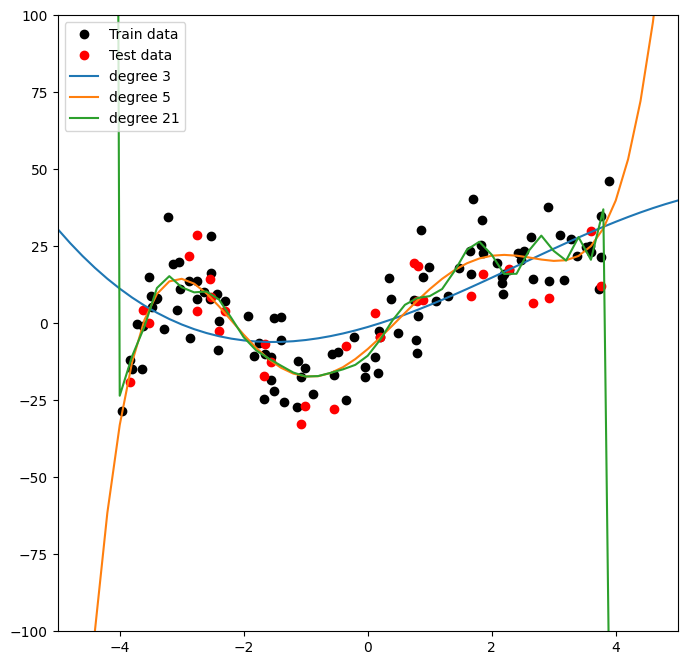

In [ ]:
_, _ = plot_curves(x_train, y_train, x_test, y_test, x_all)

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

## Answer

the Degree 3 Model has High Bias and Low Variance, whereas Degree 21 Model has Low Bias and High Variance

The **degree 5 model offers the best performance**, achieving a good tradeoff between bias and variance. The degree 3 model is too simple and underfits; it has high bias as it fails to capture the complexity of the data, leading to poor fitting on both the training and test data. The degree 21 model overfits the training data, leading to poor performance on the test data. degree 5 model offers the best performance because it is flexible enough to capture the complexity of the data (low bias) but not so complex that it overfits to noise (low variance).

(c) (5 pts) Now add a code block which trains a polynomial model of degree 21 **with $L_2$ regularization**. The regularization strength $\alpha$ is determined by 5-fold cross-validation, and examining alpha values in the range: ```alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]```

In [ ]:
def plot_curves_with_regularized(x_train, y_train, x_test, y_test, x_all):
    degs = [3, 5, 21]
    fig, ax = plt.subplots(1, 1, figsize=(8,8))

    # Plot the train and test data
    ax.plot(x_train, y_train,'ok', label='Train data')
    ax.plot(x_test, y_test, 'or', label='Test data')

    # Train and test MSE lists
    mse_train_list = []
    mse_test_list = []
    for deg in degs:
        ### COPY YOUR IMPLEMENTATION BELOW ###
        x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all = make_polynomial_features_and_standardize(deg, x_train, x_test, x_all)

        # Create a linear model and fit on the train data
        ### START CODE ###
        linear_model = LinearRegression()
        linear_model.fit(x_poly_scaled_train, y_train)
        ### END CODE ###

        # Generate the predictions for train set, test set, and x_all
        ### START CODE ###
        y_pred_train = linear_model.predict(x_poly_scaled_train)
        y_pred_test = linear_model.predict(x_poly_scaled_test)
        y_all = linear_model.predict(x_poly_scaled_all)
        ### END CODE ###

        # compute train and test mean squared error, append to the train and test MSE lists
        ### START CODE ###
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)

        ### END CODE ###
        ax.plot(x_all, y_all ,label='degree %d' % deg)
        ax.legend(loc=2)

        print(f"Degree: {deg} Train MSE: {round(mse_train, 3)} Test MSE: {round(mse_test, 3)}")
        ### COPY YOUR IMPLEMENTATION ABOVE ###

    deg = 21
    x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all = make_polynomial_features_and_standardize(deg, x_train, x_test, x_all)

    # L2 regularization coefficient
    alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
    # Do 5-fold cross validation using sklearn.model_selection.KFold with random_state set to seed
    ### START CODE ###
    num_fold = 5
    kf = KFold(n_splits=num_fold, shuffle=True, random_state=seed)
    ### END CODE ###
    min_mse, min_mse_alpha = np.inf, None
    for alpha in alphas:
        avg_mse_val = 0
        for i, (train_index, val_index) in enumerate(kf.split(x_poly_scaled_train)):
            # Do train/val split
            ### START CODE ###
            x_poly_scaled_train_split = x_poly_scaled_train[train_index]
            x_poly_scaled_val_split = x_poly_scaled_train[val_index]
            y_train_split = y_train[train_index]
            y_val_split = y_train[val_index]
            ### END CODE ###

            # Create and fit a ridge regression model using alpha to the training data, and evaluate its MSE on the validation data
            ### START CODE ###
            ridge = Ridge(alpha=alpha)
            ridge.fit(x_poly_scaled_train_split, y_train_split)
            y_pred_val = ridge.predict(x_poly_scaled_val_split)

            ### END CODE ###
        avg_mse_val /= num_fold
        if avg_mse_val < min_mse:
            # Identify the best alpha that leads to the minimum validation MSE
            ### START CODE ###
            min_mse = avg_mse_val
            min_mse_alpha = alpha
            ### END CODE ###

    # Create and fit a ridge regression model using the best alpha you found
    ### START CODE ###
    ridge = Ridge(alpha=min_mse_alpha)
    ridge.fit(x_poly_scaled_train, y_train)

    ### END CODE ###

    # Generate the predictions for train set, test set, and x_all
    ### START CODE ###
    y_pred_train = ridge.predict(x_poly_scaled_train)
    y_pred_test = ridge.predict(x_poly_scaled_test)
    y_all = ridge.predict(x_poly_scaled_all)
    ### END CODE ###

    # compute train and test mean squared error, append to the train and test MSE lists
    ### START CODE ###
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

    ### END CODE ###

    ax.plot(x_all, y_all ,label='degree %d L2 regularized' % deg)
    ax.legend(loc=2)

    print(f"Degree: {deg} (L2 regularized) Train MSE: {mse_train} Test MSE: {mse_test}")

    # print(np.mean(x_poly_scaled_train, axis=0), np.std(x_poly_scaled_train, axis=0))

    # Limit the graph to visualize the plot better
    ax.set_ylim([-100,100])
    ax.set_xlim([-5,5])
    plt.show()
    return mse_train_list, mse_test_list

Degree: 3 Train MSE: 164.219 Test MSE: 204.143
Degree: 5 Train MSE: 76.147 Test MSE: 79.604
Degree: 21 Train MSE: 66.223 Test MSE: 101.477
Degree: 21 (L2 regularized) Train MSE: 72.00032478698286 Test MSE: 78.40415033847562


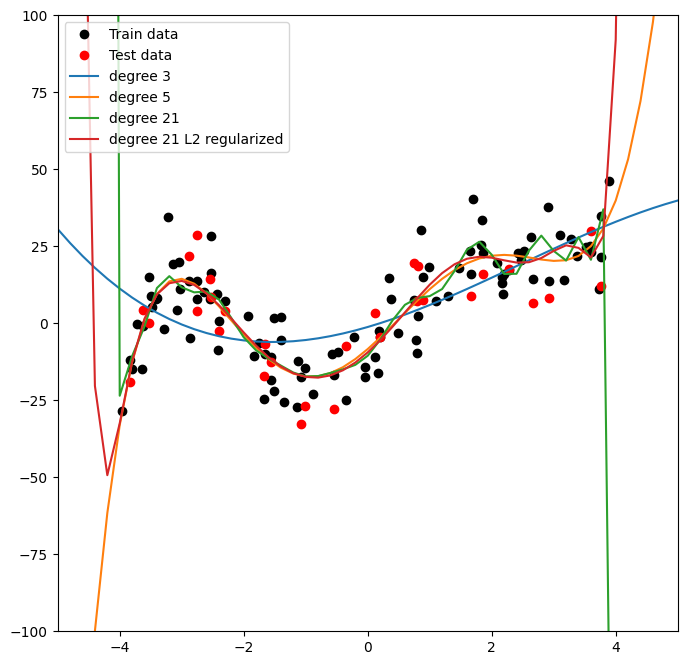

In [ ]:
_, _ = plot_curves_with_regularized(x_train, y_train, x_test, y_test, x_all)

(d) (5 pts) Analyse how the training data size affects the train and test errors of the models. For this, run the analysis in (a) using 25, 50, 75 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)'s on train & test datasets v.s. the size of the training set for the polynomials of degree 5 and 21. There will be 4 lines in total (2 polynomials $\times$ train & test datasets). **State the trends you see as you change the size of the training data on each of the models and explain why you see them.**

## Answer


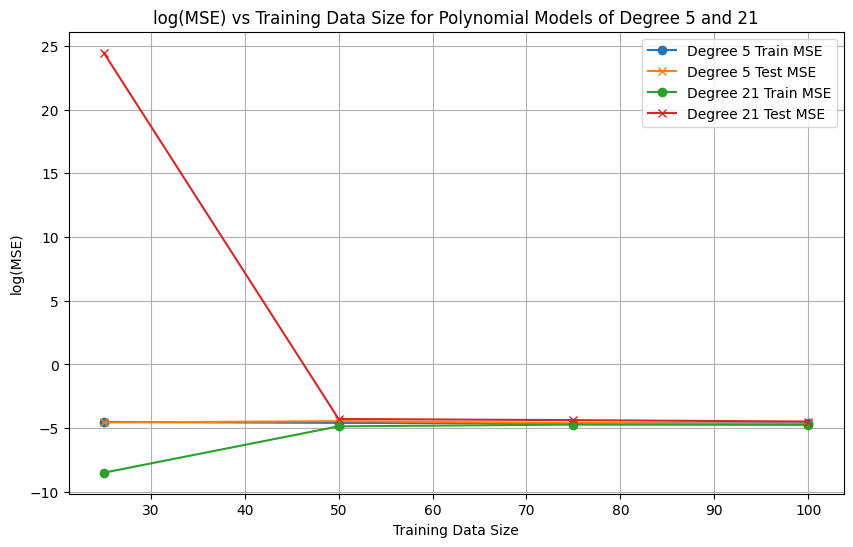

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Function to create polynomial features and standardize them
def make_polynomial_features_and_standardize(deg, x_train, x_test, x_all):
    x_poly_train = np.vander(np.squeeze(x_train), deg + 1)
    x_poly_test = np.vander(np.squeeze(x_test), deg + 1)
    x_poly_all = np.vander(np.squeeze(x_all), deg + 1)

    scaler = StandardScaler()

    x_poly_scaled_train = scaler.fit_transform(x_poly_train)
    x_poly_scaled_test = scaler.transform(x_poly_test)
    x_poly_scaled_all = scaler.transform(x_poly_all)

    return x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all

# Function to run analysis for different training set sizes
def analyze_training_size_effects(x_train_full, y_train_full, x_test, y_test, x_all):
    train_sizes = [25, 50, 75, 100]  # Training data sizes
    degs = [5, 21]  # Polynomial degrees

    # Dictionary to store log(MSE) for train and test data
    log_mse_train = {5: [], 21: []}
    log_mse_test = {5: [], 21: []}

    for deg in degs:
        for size in train_sizes:
            # Use the first `size` points of the full training set
            x_train_subset = x_train_full[:size]
            y_train_subset = y_train_full[:size]

            # Get polynomial features
            x_poly_scaled_train, x_poly_scaled_test, x_poly_scaled_all = make_polynomial_features_and_standardize(deg, x_train_subset, x_test, x_all)

            # Train model
            model = LinearRegression()
            model.fit(x_poly_scaled_train, y_train_subset)

            # Predict on train and test sets
            y_pred_train = model.predict(x_poly_scaled_train)
            y_pred_test = model.predict(x_poly_scaled_test)

            # Calculate MSE for train and test sets
            mse_train = mean_squared_error(y_train_subset, y_pred_train)
            mse_test = mean_squared_error(y_test, y_pred_test)

            # Store log(MSE)
            log_mse_train[deg].append(np.log(mse_train))
            log_mse_test[deg].append(np.log(mse_test))

    # Plot the results
    plt.figure(figsize=(10, 6))
    for deg in degs:
        plt.plot(train_sizes, log_mse_train[deg], label=f'Degree {deg} Train MSE', marker='o')
        plt.plot(train_sizes, log_mse_test[deg], label=f'Degree {deg} Test MSE', marker='x')

    plt.xlabel('Training Data Size')
    plt.ylabel('log(MSE)')
    plt.title('log(MSE) vs Training Data Size for Polynomial Models of Degree 5 and 21')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Example data generation (replace with actual data if available)
np.random.seed(0)
x_train_full = np.sort(5 * np.random.rand(100, 1) - 2.5)  # Training data (100 points)
y_train_full = np.sin(x_train_full).ravel() + 0.1 * np.random.randn(100)  # Sine wave with noise
x_test = np.sort(5 * np.random.rand(50, 1) - 2.5)  # Test data (50 points)
y_test = np.sin(x_test).ravel() + 0.1 * np.random.randn(50)  # Sine wave with noise
x_all = np.linspace(-3, 3, 100).reshape(-1, 1)  # All x points for plotting the curve

# Run the analysis
analyze_training_size_effects(x_train_full, y_train_full, x_test, y_test, x_all)


<b>  21 Degree Model: </b>  
here training error (solid green line) stays  low, no matter the dataset size, reflecting overfitting on smaller sets. that is it depicts pronounced sensitivity to training data size
Initially, the test error (solid red line) is very high due to the model overfitting the small datasets, but it drops sharply as more data is introduced.  
When the dataset reaches 100 points, the test error decreases , showing the model begins to generalize quite well only when provided with a substantial amount of data.

<b>  5 Degree Model: </b>  
training error (solid blue line) along with the test error (solid orange line) decrease progressively as the training set grows.  
The training error remains low, indicating that even with smaller datasets, the degree 5 model effectively fits the data.  
Adding more data leads to a steady decline in test error, demonstrating improved generalization as the training set expands.


therfore, as the training data size grows, the models—especially the more complex degree 21 model—show better generalization to unseen data, narrowing the gap between training and test errors.

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


## Answer

momentum enables faster convergence by reducing erratic movements in directions with high curvature and maintaining consistent progress in directions with lower curvature, effectively leading to fewer iterations needed to reach the local optima. it reduces the ocillations via:
* Exponential Averaging: Momentum computes an
exponentially weighted average of the gradients. This means that instead of using the raw gradient at each step, it uses a combination of the current gradient and a fraction of the previous gradients. This helps to stabilize the updates.
* Damping Oscillations: In optimization landscapes with elongated contours, standard gradient descent can oscillate vertically due to high curvature, slowing convergence. Momentum reduces these oscillations by averaging them closer to zero, allowing for smoother and more stable updates.
* Faster Horizontal Progress: While vertical oscillations are dampened, the horizontal component of the gradient is maintained, allowing the algorithm to progress more directly towards the local optima.
Parameter Update: The parameters are updated using these averaged gradients, which are less sensitive to noise and provide a more consistent direction towards the minimum.
* Hyperparameter (Beta): The momentum term (beta) controls how much weight is given to past gradients. A typical value is 0.9, which provides a good balance between smoothing and responsiveness to new gradients.

## Part 2. (**5 pts**) ##
Read this [article](https://www.geeksforgeeks.org/regularization-by-early-stopping/) and explain in your own words how early stopping helps prevent overfitting.

## Answer

Early stopping helps prevent overfitting by using validation performance as a guide to determine when a model has learned enough from the training data without capturing unnecessary noise, thus improving its ability to generalize to new data.
We use `dW` and `db` to update our parameters `W` and `b` during backward propagation , while in In momentum, we take the exponentially weighted averages of `dW` and `db`, instead of using `dW` and `db` independently for each epoc. The `β` parameter for momentum smoothens out the gradient measures. A higher value of `β` gives more weight to past gradients.
* Monitoring Validation Performance: During training, the model's performance is evaluated on both the training set and a separate validation set. Initially, as the model learns, both training and validation errors decrease.
* Detecting Overfitting: At some point, the validation error may start to increase even though the training error continues to decrease. This indicates that the model is beginning to overfit—it's learning noise and specific patterns in the training data that don't generalize well to new, unseen data.
* Stopping Criterion: Early stopping involves halting the training process when the validation error stops improving or starts increasing. This prevents the model from continuing to learn these non-generalizable patterns.
* Retaining Best Model: The model parameters from the epoch with the lowest validation error are saved. This ensures that you keep a version of the model that performs best on data it hasn't seen during training.
* Balancing Complexity: By stopping early, you strike a balance between underfitting (not learning enough) and overfitting (learning too much). This helps maintain a model that generalizes well to new data.

# Question 4: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four steps of gradient descent on linear regression with two parameters.

The true target function is $y = \theta_{0} + \theta_{1}x$ where $\theta_{0}=5$ and $\theta_{1}=-2$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=3$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations in total. For each setting, you will plot (a) the data and the changing linear regression models and (b) the model parameters moving over the loss landscape.

In [ ]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 5
theta1_true = -2
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [ ]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

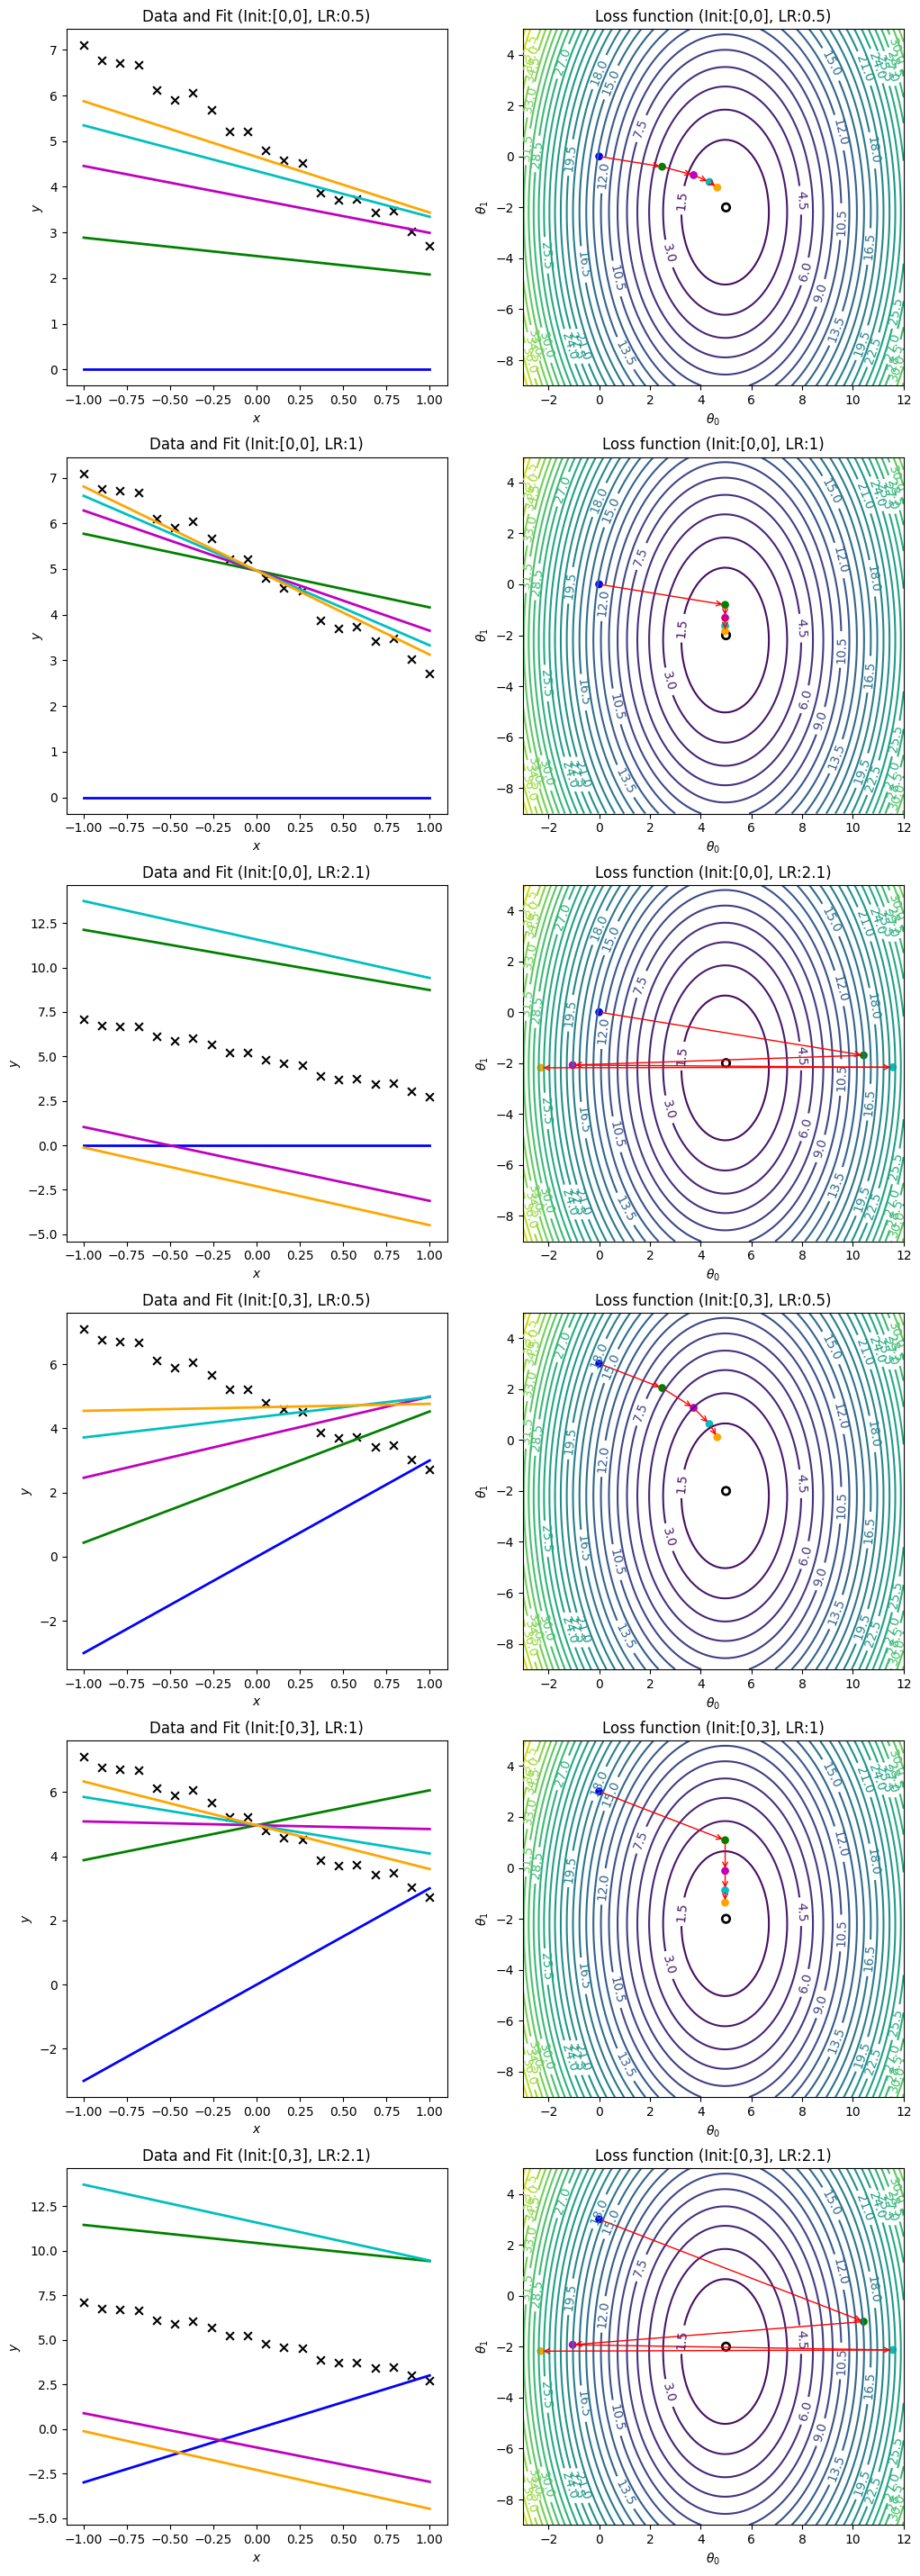

In [ ]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [[0, 0], [0, 3]]
lr_list = [0.5, 1, 2.1]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-3,12,101)
        theta1_grid = np.linspace(-9,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * np.mean(model(x, last_theta[0], last_theta[1]) - y)
            this_theta[1] = last_theta[1] - lr * np.mean((model(x, last_theta[0], last_theta[1]) - y) * x)
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(3 pts)** ##
Briefly explain how initialization affects optimization.

## Answer ##

Initialization impacts optimization by influencing convergence speed, preventing the model from getting stuck in poor local minima, and maintaining stable gradient flow. Proper initialization helps the optimizer find better solutions faster and avoids issues like  divergence and overshooting  leading to more effective training. Therefore,  initialization is crucial in shaping the e ciency and
 outcome of optimization

## Part 3. (**2 pts**) ##
Briefly explain how learning rate affects optimization.

## Answer ##

The learning rate controls the size of the steps an optimizer takes during training. A high learning rate can lead to overshooting the optimal solution, causing instability or failure to converge because model parameters move farther away from the minimum, or oscillation around the optimal point without convergence. A low learning rate makes training slow and risks getting stuck in local minima or  it may require many more iterations While it might eventually reach the optimal solution. Proper tuning balances speed and accuracy, ensuring efficient convergence to a good solution.

# Question 5: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1log(x_1) + w_2 x_2^2 + w_3x_1e^{-x_2} $$




## Answer

**Defining the loss function**

The typical loss function used is the Mean Squared Error (MSE), defined as:

$$L(w_0, w_1, w_2, w_3) = \frac{1}{2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where $\hat{y}_i$ is the predicted value from the model, and $y_i$ is the true value for the $i$-th sample. In this case:

$$\hat{y}_i = w_0 + w_1 \log(x_{1,i}) + w_2 x_{2,i}^2 + w_3 x_{1,i} e^{-x_{2,i}}$$

So, the loss for a single sample $i$ is:

$$L_i = \frac{1}{2} (y_i - \hat{y}_i)^2$$

**Computing gradients with respect to the coefficients**

We need to compute the partial derivatives of the loss function with respect to each coefficient $w_0, w_1, w_2, w_3$.

Gradient with respect to $w_0$:

$$\frac{\partial L_i}{\partial w_0} = -(y_i - \hat{y}_i)$$

Gradient with respect to $w_1$:

$$\frac{\partial L_i}{\partial w_1} = -(y_i - \hat{y}_i) \cdot \log(x_{1,i})$$

Gradient with respect to $w_2$:

$$\frac{\partial L_i}{\partial w_2} = -(y_i - \hat{y}_i) \cdot x_{2,i}^2$$

Gradient with respect to $w_3$:

$$\frac{\partial L_i}{\partial w_3} = -(y_i - \hat{y}_i) \cdot x_{1,i} e^{-x_{2,i}}$$

**Stochastic Gradient Descent update rule**

The general update rule for SGD is:

$$w_j := w_j - \eta \frac{\partial L_i}{\partial w_j}$$

where $\eta$ is the learning rate and $\frac{\partial L_i}{\partial w_j}$ is the gradient of the loss with respect to coefficient $w_j$ for a single training sample.

Thus, the updates for each coefficient are:

For $w_0$:

$$w_0 := w_0 + \eta (y_i - \hat{y}_i)$$

For $w_1$:

$$w_1 := w_1 + \eta (y_i - \hat{y}_i) \log(x_{1,i})$$

For $w_2$:

$$w_2 := w_2 + \eta (y_i - \hat{y}_i) x_{2,i}^2$$

For $w_3$:

$$w_3 := w_3 + \eta (y_i - \hat{y}_i) x_{1,i} e^{-x_{2,i}}$$


## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1log(x_1) + w_2 x_2^2 + w_3x_1e^{-x_2} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [3]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving SGD_samples (2).csv to SGD_samples (2).csv


In [11]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef -= self.learning_rate * gradient
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)

        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                error = (y[i] - self.linearPredict(X[i:i+1]))
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                gradient = 2*(-error * X[i] + self.regularization * self.coef) ##
                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.sgd(gradient)
                ### END CODE ###

            coefs.append(self.coef.copy())
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]

        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch), mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch), coefs[:, 0], label='w0')
            plt.plot(range(self.n_epoch), coefs[:, 1], label='w1')
            plt.plot(range(self.n_epoch), coefs[:, 2], label='w2')
            plt.plot(range(self.n_epoch), coefs[:, 3], label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        This output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:, 0] = 1
        x[:, 1] = np.log(X[:, 0])
        x[:, 2] = X[:, 1] ** 2
        x[:, 3] = X[:, 0] * np.exp(-1 * X[:, 1])
        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return np.dot(X, self.coef)
        ### END CODE ###

In [12]:
data = pd.read_csv('/content/SGD_samples (2).csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 1, 10, 100]

In [13]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###

best_results = []

for lr in learning_rate:
    for reg in regularization:
        model = Regression(learning_rate=lr, regularization=reg, n_epoch=n_epochs)
        model.fit(X, y)
        best_results.append((lr, reg, model.lowest_mse))

# Sort by lowest MSE and select the top 2 combinations of learning rate and regularization
best_results = sorted(best_results, key=lambda x: x[2])[:2]

### END CODE ###

<ipython-input-11-9d2056b876ce>:45: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-11-9d2056b876ce>:35: RuntimeWarning: overflow encountered in multiply
  gradient = 2*(-error * X[i] + self.regularization * self.coef)
<ipython-input-11-9d2056b876ce>:18: RuntimeWarning: invalid value encountered in subtract
  self.coef -= self.learning_rate * gradient
<ipython-input-11-9d2056b876ce>:35: RuntimeWarning: invalid value encountered in multiply
  gradient = 2*(-error * X[i] + self.regularization * self.coef)
<ipython-input-11-9d2056b876ce>:35: RuntimeWarning: overflow encountered in add
  gradient = 2*(-error * X[i] + self.regularization * self.coef)
<ipython-input-11-9d2056b876ce>:18: RuntimeWarning: overflow encountered in multiply
  self.coef -= self.learning_rate * gradient


Learning rate: 0.001, Regularization: 0
Learning rate: 0.01, Regularization: 0


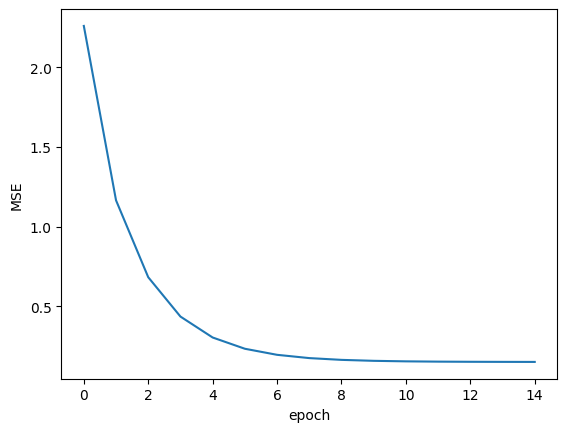

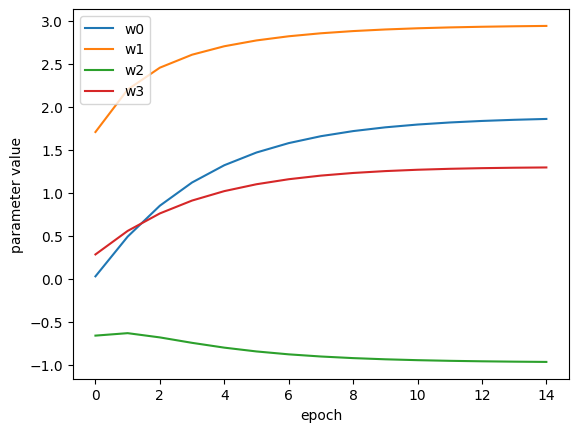

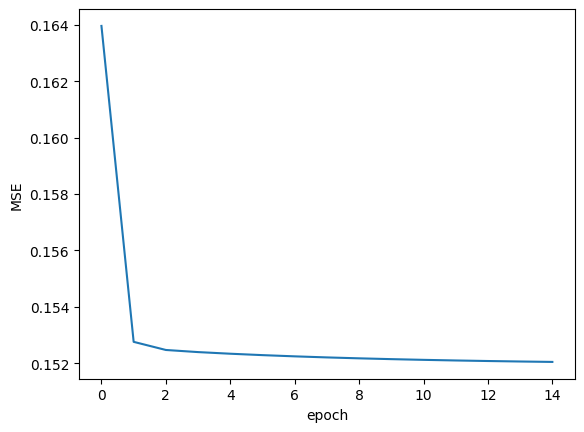

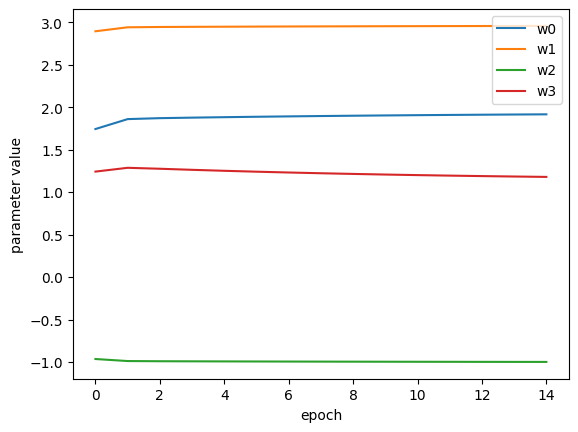

In [15]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (1
### START CODE ###
for lr, reg, _ in best_results:
    print(f"Learning rate: {lr}, Regularization: {reg}")
    model = Regression(learning_rate=lr, regularization=reg, n_epoch=n_epochs)
    model.fit(X, y, plot=True)

### END CODE ###

In [16]:

print('Lowest MSE for the two best combinations:')
for lr, reg, mse in best_results:
    print(f"Learning rate: {lr}, Regularization: {reg}, MSE: {mse}")


Lowest MSE for the two best combinations:
Learning rate: 0.001, Regularization: 0, MSE: 0.15038751055102273
Learning rate: 0.01, Regularization: 0, MSE: 0.15204723495161568
